# Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# dataset = E-commerce Dataset , Source : kaggle

In [2]:
df=pd.read_csv("ecom.csv")

In [3]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.describe

<bound method NDFrame.describe of                              Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ..

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


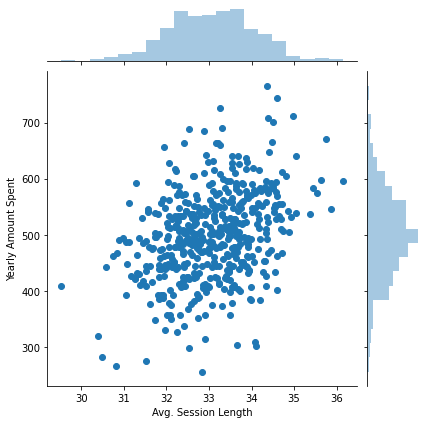

In [8]:
sns.jointplot(df['Avg. Session Length'],df['Yearly Amount Spent'])

<AxesSubplot:>

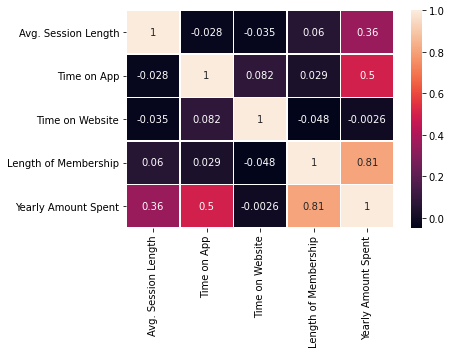

In [9]:
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

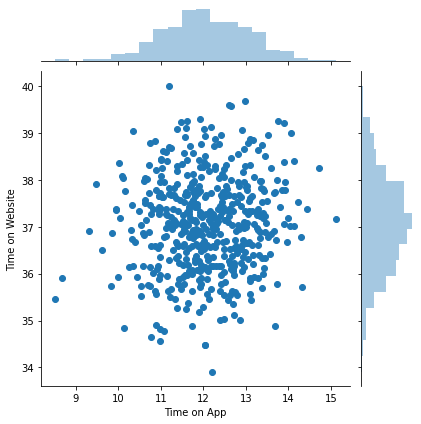

In [10]:
sns.jointplot(df['Time on App'],df['Time on Website'])

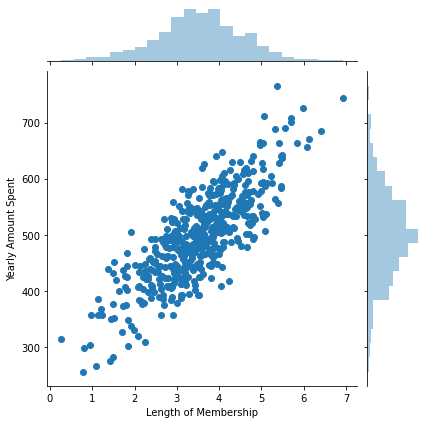

In [11]:
sns.jointplot(df['Length of Membership'],df['Yearly Amount Spent'])

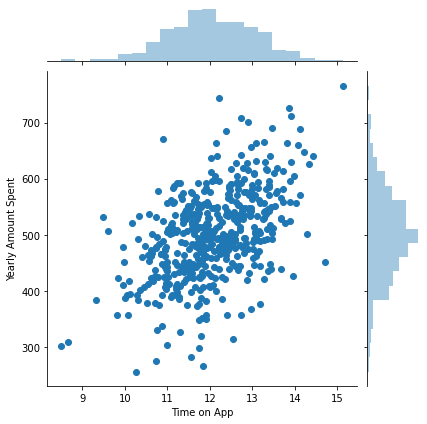

In [12]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'])

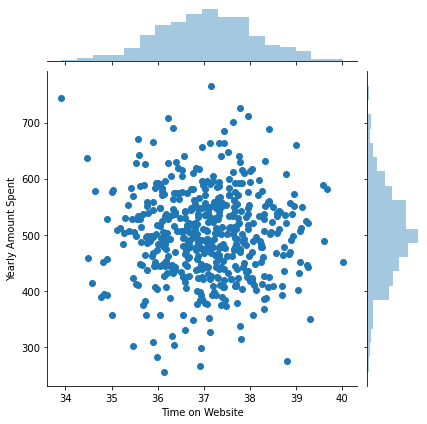

In [13]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'])

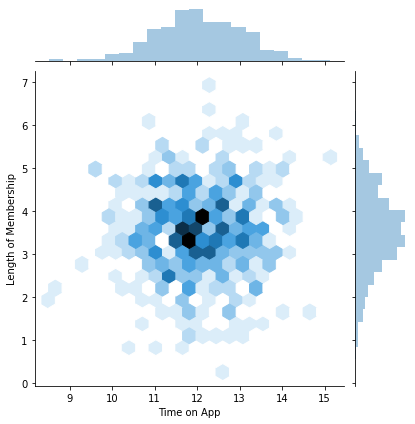

In [14]:
sns.jointplot(df['Time on App'],df['Length of Membership'],kind='hex')

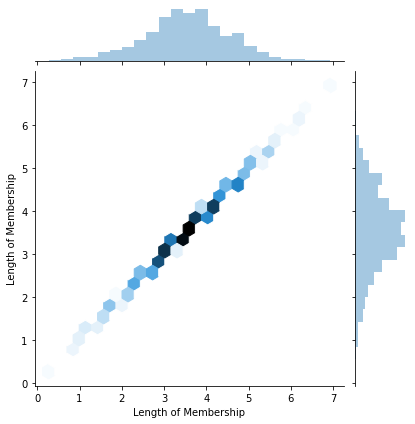

In [15]:
sns.jointplot(df['Length of Membership'],df['Length of Membership'],kind='hex')

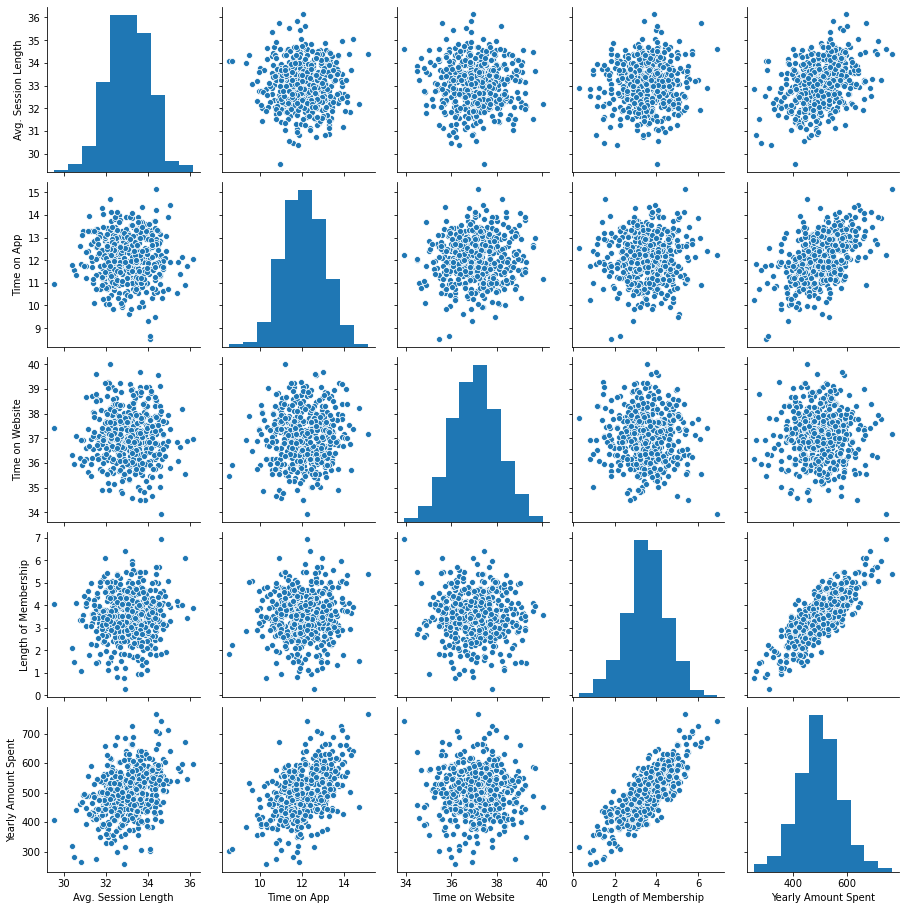

In [16]:
sns.pairplot(df)

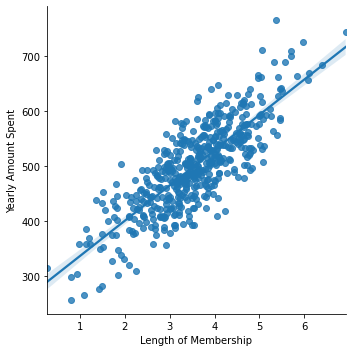

In [17]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = df)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
lm = LinearRegression()
lm.fit(x_train,y_train)
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.572414
Time on App,38.612373
Time on Website,0.236449
Length of Membership,62.289125


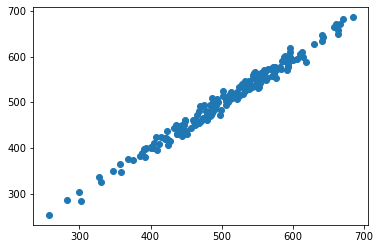

In [19]:
#Predicting the output using the model
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.35629185541306
MSE: 103.65636295187181
RMSE: 10.18117689424321


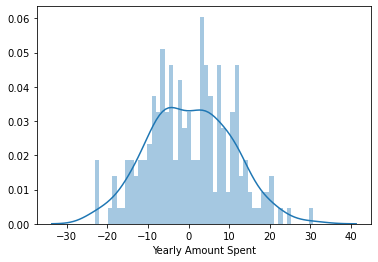

In [21]:
sns.distplot((y_test-predictions),bins=50);

(array([ 3.,  3.,  5., 22., 30., 44., 42., 34.,  9.,  8.]),
 array([256.67058229, 299.41986716, 342.16915204, 384.91843691,
        427.66772178, 470.41700665, 513.16629153, 555.9155764 ,
        598.66486127, 641.41414614, 684.16343102]),
 <BarContainer object of 10 artists>)

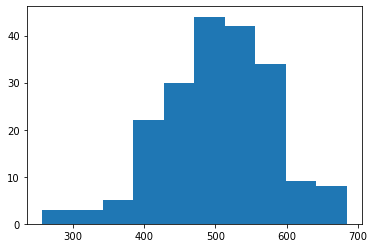

In [22]:
plt.hist((y_test))